## 1D - Fermions Polarized

In [69]:



DATA_PATH = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/final_results_v0_{v_0}.csv"
data_hf_path = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/data_hf.csv"
data_ci_path = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/data_ci.csv"

from nqs.state.utils import plot_style
import seaborn as sns
import pandas as pd

# combine v_0 =-20, -10, 0, 10, 20 into one df

v_0s = [-20, -10, 0, 10, 20]
dfs = []
for v_0 in v_0s:
    df = pd.read_csv(DATA_PATH.format(v_0=v_0))
    df["v_0"] = v_0
    dfs.append(df)
dfs


[      E_energy  E_std_error    E_variance   K_energy  K_std_error  \
 0     2.428745     0.025787  2.835806e+00   0.932382     0.013737   
 1    24.865544     0.452810  1.185083e+02   2.611935     0.032628   
 2     9.888779     0.274995  5.848657e+01   3.820949     0.044567   
 3    18.819788     0.386460  8.566993e+01   5.158438     0.050063   
 4     8.086012     0.261219  6.523823e+01   7.912207     0.071755   
 5    -2.289508     0.001467  2.377144e+01   4.767822     0.003078   
 6    -2.289508     0.001467  2.377144e+01   4.767822     0.003078   
 7    -2.289508     0.001467  2.377144e+01   4.767822     0.003078   
 8    -7.248880     0.002220  3.734502e+01  12.549682     0.006041   
 9   -13.359686     0.002748  4.147481e+01  22.260611     0.009312   
 10  -20.065022     0.003467  4.953514e+01  34.193575     0.013616   
 11  -26.869642     0.003971  4.712391e+01  46.909185     0.017533   
 12   -2.274709     0.001591  2.801112e+01   4.675920     0.003155   
 13   -6.511758     

In [70]:
# merge them all into one df
df = pd.concat(dfs)

# drop if samples is not 16777216
df = df[df["nsamples"] == 16777216]

# # drop duplicate E_energy
df = df.drop_duplicates(subset="E_energy")

# when a combination of N and 

df_hf = pd.read_csv(data_hf_path)
df_ci = pd.read_csv(data_ci_path)
#print(df_hf)

# make df_hf["Energy"] be called E_energy, and df_hf["A"] be called n_particles and df_hf["V0"] be called v_0
df_hf = df_hf.rename(columns={"Energy": "E_energy", "A": "n_particles", "V0": "v_0"})
df_ci = df_ci.rename(columns={"Energy": "E_energy", "A": "n_particles", "V0": "v_0"})
# drop all columns except n_particles, v_0, and E_energy
df_hf = df_hf[["n_particles", "v_0", "E_energy"]]
df_ci = df_ci[["n_particles", "v_0", "E_energy"]]
# now add the value of df_hf to df under the nqs_type = "HF", when n_particles matches and v_0 matches

df = df.merge(df_hf, on=["n_particles", "v_0"], how="left")
df = df.merge(df_ci, on=["n_particles", "v_0"], how="left")
# now correct the energy columns to be E_energy_nqs, E_energy_hf, E_energy_ci

df = df.rename(columns={"E_energy": "E_energy_ci", "E_energy_x": "E_energy", "E_energy_y": "E_energy_hf"})

# keep only E_energy(error), 'K_energy(error)', 'PE_trap_energy(error)', 'PE_int_energy(error)', n_paticles, and v_0 and nqs_type
df = df[['E_energy(error)', 'K_energy(error)', 'PE_trap_energy(error)', 'PE_int_energy(error)', 'n_particles', 'v_0', 'nqs_type', 'E_energy_hf',"E_energy_ci" ,
         "E_std_error", "K_std_error", "PE_trap_std_error", "PE_int_std_error"]]

# rename to make  E_energy(error) = E, K_energy(error) = $\langle \hat{K}$\rangle, PE_trap_energy(error) = $\langle \hat{V}_{trap}\rangle$, PE_int_energy(error) = $\langle \hat{V}_{int}\rangle$
df = df.rename(columns={"E_energy(error)": "E","E_energy_ci":"$E_{ci}$","E_energy_hf":"$E_{hf}$", "K_energy(error)": "$\langle \hat{K}\rangle$", "PE_trap_energy(error)": "$\langle \hat{V}_{trap}\rangle$", "PE_int_energy(error)": "$\langle \hat{V}_{int}\rangle$"})

# check if there are two rows with the same n_particles and v_0, and if so, print them
duplicates = df[df.duplicated(subset=["n_particles", "v_0", "nqs_type"], keep=False)]
if len(duplicates) > 0:
    print(duplicates)
    # keep the lowest E_energy
#     df = df.sort_values("E").drop_duplicates(subset=["n_particles", "v_0", "nqs_type"], keep="first")

# # check if duplicattes again
# duplicates = df[df.duplicated(subset=["n_particles", "v_0", "nqs_type"], keep=False)]
# if len(duplicates) > 0:
#     print(duplicates)
#     raise ValueError("There are still duplicates")

# get some latex printout
# first, aggregate N, and have columsn V_0, VMC, DSFFN ,HF, CI, RBM
######## LATEX STUFF

df = df.rename(columns={"n_particles": "N"})
df.columns
#df = df[["N", "v_0", "E", "$E_{hf}$","nqs_type"]]

##### latex stuff to save if needed
# # Pivot the dataframe to reshape it as needed
# reshaped_df = df.pivot(index=['N', 'v_0'], columns='nqs_type', values='E').reset_index()
# reshaped_df = pd.merge(reshaped_df, df[['N', 'v_0', '$E_{hf}$']].drop_duplicates(), on=['N', 'v_0'])
# # Sort the dataframe by the number of particles
# reshaped_df = reshaped_df.sort_values(["N"])
# # Add the E_hf column back to the reshaped dataframe


# # Display the reshaped dataframe
# #import ace_tools as tools; tools.display_dataframe_to_user(name="Reshaped DataFrame", dataframe=reshaped_df)
# #reshaped_df.head()

# print(reshaped_df)
# # rename vmc to VMC, dsffn to DSFFN, hf to HF, ci to CI, rbm to RBM
# reshaped_df = reshaped_df.rename(columns={"vmc": "VMC", "dsffn": "DSFFN", "rbm": "RBM", "v_0": "$V_0$", "$E_{hf}$": "$E_{HF}$"})

# # noq agglutinate number of particles N


# print(reshaped_df.to_latex(index=False, escape=False, column_format="c|c|c|c|c|c"))

# df = df[['E', '$\langle \hat{K}\rangle$', '$\langle \hat{V}_{trap}\rangle$',
#        '$\langle \hat{V}_{int}\rangle$', 'N', 'v_0', 'nqs_type']]



# df = df[df["N"] == 4]
# # sort by nqs_type
# df = df.sort_values("nqs_type")
# print(df)
# # change it to first column
# df = df[["nqs_type", "E", "$\langle \hat{K}\rangle$", "$\langle \hat{V}_{trap}\rangle$", "$\langle \hat{V}_{int}\rangle$"]]
# print(df.to_latex(index=False, escape=False, column_format="c|c|c|c|c"))

# now I need to select N = 4 and agglutinate the nqs type to be the first column




            E $\langle \hat{K}\rangle$ $\langle \hat{V}_{trap}\rangle$  \
6    -6.51(2)                 12.85(2)                       0.6626(7)   
15  -7.215(3)                12.303(6)                       0.6319(5)   
22   1.014(8)                 6.021(9)                       1.0229(7)   
31  0.7920(9)                 5.743(3)                       1.0350(7)   
38   4.589(2)                 2.340(2)                        2.250(1)   
47   4.706(1)                 2.445(2)                        2.261(1)   
54   6.020(1)                 1.580(1)                        3.369(2)   
63   6.053(1)                 1.612(1)                        3.355(2)   
70   6.883(2)                 1.338(1)                        4.149(2)   
79   6.901(2)                 1.367(1)                        4.091(2)   

   $\langle \hat{V}_{int}\rangle$  n_particles  v_0 nqs_type  $E_{hf}$  \
6                      -20.026(7)            3  -20      rbm -6.764263   
15                     -20.150(6)    

Index(['E', '$\langle \hat{K}\rangle$', '$\langle \hat{V}_{trap}\rangle$',
       '$\langle \hat{V}_{int}\rangle$', 'N', 'v_0', 'nqs_type', '$E_{hf}$',
       '$E_{ci}$', 'E_std_error', 'K_std_error', 'PE_trap_std_error',
       'PE_int_std_error'],
      dtype='object')

In [71]:

#print complete view even if large

pd.set_option('display.max_rows', None)



# let us get total energy as a function of v_0 for all nqs_types. Let us do that only for N2, n4 and n6 particles

df = df[df["N"].isin([2, 4, 6])]

# Make E value numeric and without (error) in the ty
df["E"] = df["E"].apply(lambda x: float(x.split("(")[0]))
df
# write this to a csv   
#df.to_csv("/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/big_data_all.csv", index=False)

,E,$\langle \hat{K}\rangle$,$\langle \hat{V}_{trap}\rangle$,$\langle \hat{V}_{int}\rangle$,N,v_0,nqs_type,$E_{hf}$,$E_{ci}$,E_std_error,K_std_error,PE_trap_std_error,PE_int_std_error
0,-2.290000,4.768(3),0.3417(3),-7.399(3),2,-20,vmc,-1.891464,-2.424647,0.001467,0.003078,0.000287,0.002555
2,-13.360000,22.261(9),0.8186(4),-36.439(9),4,-20,vmc,-12.812753,-12.193542,0.002748,0.009312,0.000412,0.008949
4,-26.870000,46.91(2),1.8295(8),-75.61(2),6,-20,vmc,-26.277663,NaN,0.003971,0.017533,0.000768,0.017358
5,-2.275000,4.676(3),0.4065(4),-7.357(3),2,-20,rbm,-1.891464,-2.424647,0.001591,0.003155,0.000397,0.002590
7,-13.294000,22.36(1),0.9751(8),-36.63(1),4,-20,rbm,-12.812753,-12.193542,0.003499,0.010135,0.000844,0.009582
9,-26.805000,46.81(2),2.135(2),-75.75(2),6,-20,rbm,-26.277663,NaN,0.005218,0.019324,0.001912,0.018830
10,-2.289000,4.742(3),0.3424(3),-7.373(3),2,-20,dsffn,-1.891464,-2.424647,0.001469,0.003056,0.000289,0.002552
11,-13.372000,22.16(1),0.8303(5),-36.364(9),4,-20,dsffn,-12.812753,-12.193542,0.002731,0.009697,0.000476,0.009379
13,-26.855000,48.68(2),1.7675(8),-77.30(2),6,-20,dsffn,-26.277663,NaN,0.003723,0.018268,0.000760,0.017663
16,0.633400,2.460(2),0.5389(4),-2.366(1),2,-10,vmc,0.813691,0.599067,0.000577,0.001736,0.000440,0.001316


Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/fermion_polarized/total_energy_vs_v0_n2.pdf
Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/fermion_polarized/total_energy_vs_v0_n4.pdf
Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/fermion_polarized/total_energy_vs_v0_n6.pdf


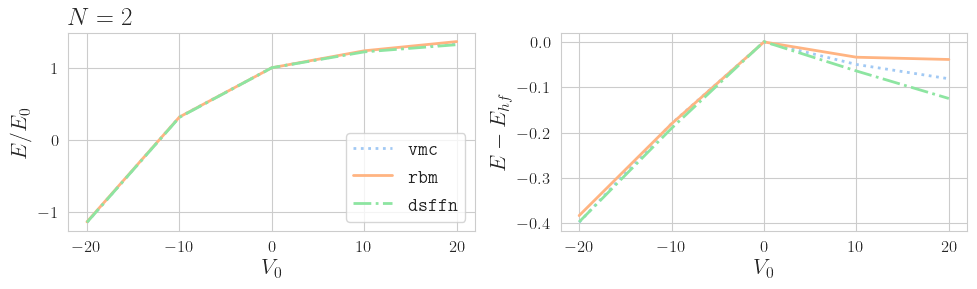

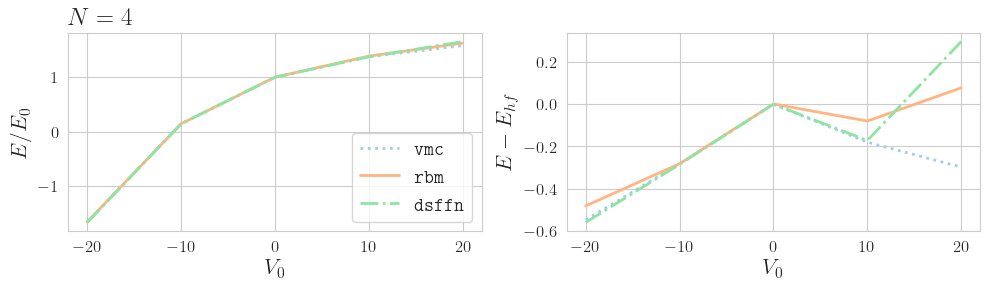

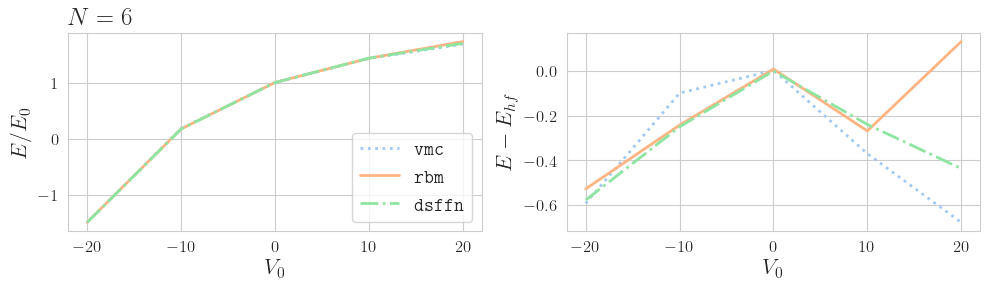

In [75]:



# now make a plot of E vs v_0 for all nqs_types. each line is a nqs_type and there are 3 different plots side by side, then make also e - E_hf
import matplotlib.pyplot as plt

# create E/E_0 column, where E_0 = N^2/2
df["E/E_0"] = df["E"] / (df["N"] ** 2 / 2)


for i, n_particles in enumerate([2, 4, 6]):
    fig, axs = plt.subplots(1, 3, figsize=(10, 3))

    for nqs_type in df["nqs_type"].unique():
        df_nqs = df[(df["nqs_type"] == nqs_type) & (df["N"] == n_particles)]
        # change line style
        if nqs_type == "rbm":
            linestyle = "-"
        elif nqs_type == "vmc":
            linestyle = ":"
        elif nqs_type == "dsffn":
            linestyle = "-."

        #axs[0].plot(df_nqs["v_0"], df_nqs["E/E_0"], label=nqs_type, linestyle=linestyle)
        # add error as shaded region
        #axs[0].fill_between(df_nqs["v_0"], df_nqs["E/E_0"] - df_nqs["E_std_error"]/(n_particles ** 2 / 2), df_nqs["E"] + df_nqs["E_std_error"]/(n_particles ** 2 / 2), alpha=0.3)


        axs[i].plot(df_nqs["v_0"], df_nqs["E"] - df_nqs["$E_{hf}$"], label=nqs_type, linestyle=linestyle)

    axs[i].set_xlabel("$V_0$")
    axs[i].set_title(f"$N={n_particles}$", loc="left")
    # add legend
    axs[0].legend()

axs[0].set_ylabel("$E - E_{hf}$")

    
    #axs[1].set_xlabel("$V_0$")



plt.tight_layout()

plot_style.save(f"fermion_polarized/total_energy_vs_v0_n{n_particles}")


In [73]:
# Assuming df is your dataframe and is already loaded
import seaborn as sns
# Convert energy components to numeric
df["$\langle \hat{K}\rangle$"] = df["$\langle \hat{K}\rangle$"].apply(lambda x: float(x.split("(")[0]))
df["$\langle \hat{V}_{trap}\rangle$"] = df["$\langle \hat{V}_{trap}\rangle$"].apply(lambda x: float(x.split("(")[0]))
df["$\langle \hat{V}_{int}\rangle$"] = df["$\langle \hat{V}_{int}\rangle$"].apply(lambda x: float(x.split("(")[0]))

Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/fermion_polarized/energy_components_vs_v0.pdf


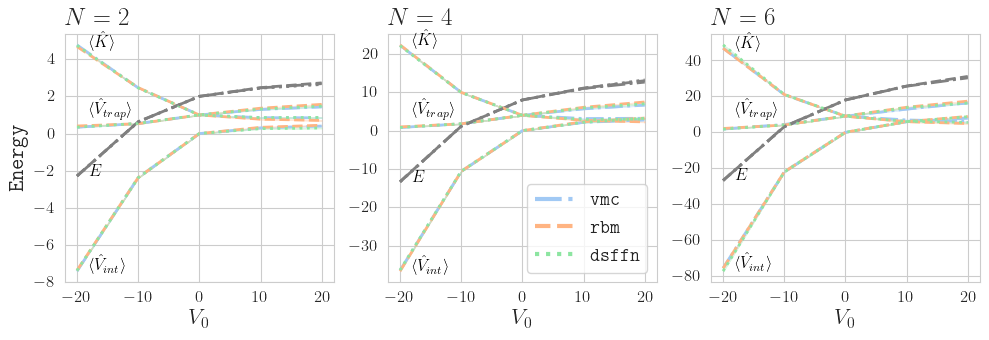

In [74]:

from matplotlib.lines import Line2D

pastel_colors = sns.color_palette("pastel", len(df["nqs_type"].unique()))

n_particles_list = [2, 4, 6]
fig, axs = plt.subplots(1, len(n_particles_list), figsize=(10, 3.5))

nqs_types = df["nqs_type"].unique()
linestyles = ["-.", "--", ":", ":"]

# Create a dictionary for different line styles for each nqs_type
line_styles_dict = {nqs_type: linestyles[i % len(linestyles)] for i, nqs_type in enumerate(nqs_types)}

for i, n_particles in enumerate(n_particles_list):
    for color, nqs_type in zip(pastel_colors, nqs_types):
        df_nqs = df[(df["nqs_type"] == nqs_type) & (df["N"] == n_particles)]
        linestyle = line_styles_dict[nqs_type]

        # Plot the energy components with linestyle denoting the type of energy
        axs[i].plot(df_nqs["v_0"], df_nqs["$\langle \hat{K}\rangle$"], color=color, label=f"{nqs_type}" if i == 0 else "", linestyle=linestyle)
        axs[i].fill_between(df_nqs["v_0"], df_nqs["$\langle \hat{K}\rangle$"] - df_nqs["K_std_error"], df_nqs["$\langle \hat{K}\rangle$"] + df_nqs["K_std_error"], color=color, alpha=0.3)

        axs[i].plot(df_nqs["v_0"], df_nqs["$\langle \hat{V}_{trap}\rangle$"], color=color, linestyle=linestyle)
        axs[i].fill_between(df_nqs["v_0"], df_nqs["$\langle \hat{V}_{trap}\rangle$"] - df_nqs["PE_trap_std_error"], df_nqs["$\langle \hat{V}_{trap}\rangle$"] + df_nqs["PE_trap_std_error"], color=color, alpha=0.3)

        axs[i].plot(df_nqs["v_0"], df_nqs["$\langle \hat{V}_{int}\rangle$"], color=color, linestyle=linestyle)
        axs[i].fill_between(df_nqs["v_0"], df_nqs["$\langle \hat{V}_{int}\rangle$"] - df_nqs["PE_int_std_error"], df_nqs["$\langle \hat{V}_{int}\rangle$"] + df_nqs["PE_int_std_error"], color=color, alpha=0.3)

        # add a total energy line
        axs[i].plot(df_nqs["v_0"], df_nqs["E"], color="gray", linestyle=linestyle)
        #axs[i].fill_between(df_nqs["v_0"], df_nqs["E"] - df_nqs["E_std_error"], df_nqs["E"] + df_nqs["E_std_error"], color=color, alpha=0.3)



        # Adding text annotations for interaction types
        if nqs_type == "rbm":
            min_v0 = (df_nqs["v_0"].min()*0.9 ) 
            axs[i].text(min_v0, df_nqs["$\langle \hat{K}\rangle$"].max(), '$\langle \hat{K}\\rangle$', color='black', fontsize=12, ha='left')
            axs[i].text(min_v0, df_nqs["$\langle \hat{V}_{trap}\rangle$"].mean(), '$\langle \hat{V}_{trap}\\rangle$', color='black', fontsize=12, ha='left')
            axs[i].text(min_v0, df_nqs["$\langle \hat{V}_{int}\rangle$"].min(), '$\langle \hat{V}_{int}\\rangle$', color='black', fontsize=12, ha='left')
            axs[i].text(min_v0, df_nqs["E"].min(), '$E$', color='black', fontsize=12, ha='left')
    axs[i].set_xlabel("$V_0$")
    axs[i].set_title(f"$N={n_particles}$", loc="left")

legend_colors = [Line2D([0], [0], color=color, lw=3, label=nqs_type, linestyle=linestyle) for color, nqs_type, linestyle in zip(pastel_colors, nqs_types, linestyles)]

axs[1].legend(handles=legend_colors, loc='lower right')

axs[0].set_ylabel("Energy")
plt.tight_layout()





plot_style.save(f"fermion_polarized/energy_components_vs_v0")

In [ ]:
DATA_PATH = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/final_results_omega_{omega}.csv"
data_hf_path = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/data_hf.csv"

omegas = [-20, -10, 0, 10, 20]
dfs = []
for omega in omegas:
    df = pd.read_csv(DATA_PATH.format(omega=omega))
    df["omega"] = omega
    dfs.append(df)


In [ ]:
# merge them all into one df
df = pd.concat(dfs)

# drop if samples is not 16777216
df = df[df["nsamples"] == 16777216]

# # drop duplicate E_energy
df = df.drop_duplicates(subset="E_energy")


df_hf = pd.read_csv(data_hf_path)
df_ci = pd.read_csv(data_ci_path)
#print(df_hf)

# make df_hf["Energy"] be called E_energy, and df_hf["A"] be called n_particles and df_hf["V0"] be called v_0
df_hf = df_hf.rename(columns={"Energy": "E_energy", "A": "n_particles", "V0": "v_0"})
df_ci = df_ci.rename(columns={"Energy": "E_energy", "A": "n_particles", "V0": "v_0"})
# drop all columns except n_particles, v_0, and E_energy
df_hf = df_hf[["n_particles", "v_0", "E_energy"]]
df_ci = df_ci[["n_particles", "v_0", "E_energy"]]
# now add the value of df_hf to df under the nqs_type = "HF", when n_particles matches and v_0 matches

df = df.merge(df_hf, on=["n_particles", "v_0"], how="left")
df = df.merge(df_ci, on=["n_particles", "v_0"], how="left")
# now correct the energy columns to be E_energy_nqs, E_energy_hf, E_energy_ci

df = df.rename(columns={"E_energy": "E_energy_ci", "E_energy_x": "E_energy", "E_energy_y": "E_energy_hf"})

# keep only E_energy(error), 'K_energy(error)', 'PE_trap_energy(error)', 'PE_int_energy(error)', n_paticles, and v_0 and nqs_type
df = df[['E_energy(error)', 'K_energy(error)', 'PE_trap_energy(error)', 'PE_int_energy(error)', 'n_particles', 'v_0', 'nqs_type', 'E_energy_hf',"E_energy_ci" ,
         "E_std_error", "K_std_error", "PE_trap_std_error", "PE_int_std_error"]]

# rename to make  E_energy(error) = E, K_energy(error) = $\langle \hat{K}$\rangle, PE_trap_energy(error) = $\langle \hat{V}_{trap}\rangle$, PE_int_energy(error) = $\langle \hat{V}_{int}\rangle$
df = df.rename(columns={"E_energy(error)": "E","E_energy_ci":"$E_{ci}$","E_energy_hf":"$E_{hf}$", "K_energy(error)": "$\langle \hat{K}\rangle$", "PE_trap_energy(error)": "$\langle \hat{V}_{trap}\rangle$", "PE_int_energy(error)": "$\langle \hat{V}_{int}\rangle$"})

# check if there are two rows with the same n_particles and v_0, and if so, print them
duplicates = df[df.duplicated(subset=["n_particles", "v_0", "nqs_type"], keep=False)]
if len(duplicates) > 0:
    print(duplicates)
    # keep the lowest E_energy
#     df = df.sort_values("E").drop_duplicates(subset=["n_particles", "v_0", "nqs_type"], keep="first")

# # check if duplicattes again
# duplicates = df[df.duplicated(subset=["n_particles", "v_0", "nqs_type"], keep=False)]
# if len(duplicates) > 0:
#     print(duplicates)
#     raise ValueError("There are still duplicates")

# get some latex printout
# first, aggregate N, and have columsn V_0, VMC, DSFFN ,HF, CI, RBM
######## LATEX STUFF

df = df.rename(columns={"n_particles": "N"})
df.columns
#df = df[["N", "v_0", "E", "$E_{hf}$","nqs_type"]]

##### latex stuff to save if needed
# # Pivot the dataframe to reshape it as needed
# reshaped_df = df.pivot(index=['N', 'v_0'], columns='nqs_type', values='E').reset_index()
# reshaped_df = pd.merge(reshaped_df, df[['N', 'v_0', '$E_{hf}$']].drop_duplicates(), on=['N', 'v_0'])
# # Sort the dataframe by the number of particles
# reshaped_df = reshaped_df.sort_values(["N"])
# # Add the E_hf column back to the reshaped dataframe


# # Display the reshaped dataframe
# #import ace_tools as tools; tools.display_dataframe_to_user(name="Reshaped DataFrame", dataframe=reshaped_df)
# #reshaped_df.head()

# print(reshaped_df)
# # rename vmc to VMC, dsffn to DSFFN, hf to HF, ci to CI, rbm to RBM
# reshaped_df = reshaped_df.rename(columns={"vmc": "VMC", "dsffn": "DSFFN", "rbm": "RBM", "v_0": "$V_0$", "$E_{hf}$": "$E_{HF}$"})

# # noq agglutinate number of particles N


# print(reshaped_df.to_latex(index=False, escape=False, column_format="c|c|c|c|c|c"))

# df = df[['E', '$\langle \hat{K}\rangle$', '$\langle \hat{V}_{trap}\rangle$',
#        '$\langle \hat{V}_{int}\rangle$', 'N', 'v_0', 'nqs_type']]



# df = df[df["N"] == 4]
# # sort by nqs_type
# df = df.sort_values("nqs_type")
# print(df)
# # change it to first column
# df = df[["nqs_type", "E", "$\langle \hat{K}\rangle$", "$\langle \hat{V}_{trap}\rangle$", "$\langle \hat{V}_{int}\rangle$"]]
# print(df.to_latex(index=False, escape=False, column_format="c|c|c|c|c"))

# now I need to select N = 4 and agglutinate the nqs type to be the first column


